# k-NN project: Dating Classification

The data can be downloaded from [here](https://www.manning.com/downloads/1108) (CH02/datingTestSet2.txt).


## Background
Helen dated several people and rated them using a three-point scale: 3 is best and 1 is worst. She also collected data from all her dates and recorded them in the file attached. These data contains 3 features:

- Number of frequent flyer miles earned per year
- Percentage of time spent playing video games
- Liters of ice cream consumed per week

We would like to predict her ratings of new dates when we are given the three features. 

The data contains four columns, while the first column refers to `Mileage`, the second `Gamingtime`, the third `Icecream` and the fourth `Rating`. 

## Look at Data

We first load the data and store it into a DataFrame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./assests/datasets/datingTestSet2.txt', sep='\t', header=None)
df.head()

,0,1,2,3
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


To make it easier to read, we would like to change the name of the columns.

In [2]:
df = df.rename(columns={0: "Mileage", 1: "Gamingtime", 2: 'Icecream', 3: 'Rating'})
df.head()

,Mileage,Gamingtime,Icecream,Rating
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


We use `matplotlib.pyplot.scatter` to look at the scattering plots. From the below plots, it seems that `Icecream`.

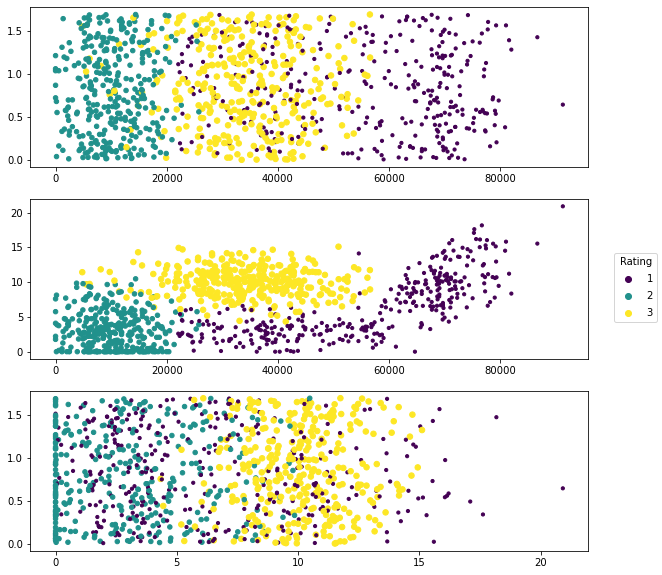

In [3]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
scatter1 = ax1.scatter(df['Mileage'], df['Icecream'], 
                     s=10*df['Rating'], c=np.array(df['Rating']))
scatter2 = ax2.scatter(df['Mileage'], df['Gamingtime'], 
                     s=10*df['Rating'], c=np.array(df['Rating']))
scatter3 = ax3.scatter(df['Gamingtime'], df['Icecream'], 
                     s=10*df['Rating'], c=np.array(df['Rating']))

fig.legend(*scatter1.legend_elements(),
           loc="right", title="Rating")
plt.show()

## Applying kNN

In [4]:
from assests.codes.knn import classify_kNN, dataSplit, classify_kNN_test, encodeNorm, decodeNorm

X = np.array(df[['Mileage', 'Gamingtime', 'Icecream']])
y = np.array(df['Rating'])

X_train, y_train, X_test, y_test = dataSplit(X, y, splitrate=0.9)
X_train_norm, parameters = encodeNorm(X_train)
X_test_norm, _ = encodeNorm(X_test, parameters=parameters)



In [5]:
errorrate = list()
for i in range(1,20):
    errorrate.append(classify_kNN_test(X_test_norm, y_test, X_train_norm, y_train, k=i))
best = np.array(errorrate).argsort()[0]
print(best)
print(errorrate[best])


18
0.04


In [6]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10, weights='distance')
neigh.fit(X_train_norm, y_train)
r2 = neigh.predict(X_test_norm)

In [7]:
r = np.array([classify_kNN(inX, X_train_norm, y_train, k=10) for inX in X_test_norm])

In [8]:
r-r2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
d = df.to_numpy()

In [10]:
d

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01, 3.0000000e+00],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00, 2.0000000e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01, 1.0000000e+00],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01, 3.0000000e+00],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01, 3.0000000e+00],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00, 3.0000000e+00]])

In [11]:
d.shape

(1000, 4)

In [12]:
from sklearn.datasets import load_iris
import numpy as np

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:

X = d[:, :3]
y = d[:,-1]

In [15]:
treeclf = DecisionTreeClassifier(max_depth=3)
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [16]:
treeclf

DecisionTreeClassifier(max_depth=3)

In [17]:
print(treeclf)

DecisionTreeClassifier(max_depth=3)


[Text(0.5, 0.875, 'X[0] <= 21435.5\ngini = 0.667\nsamples = 1000\nvalue = [342, 331, 327]'),
 Text(0.25, 0.625, 'X[1] <= 8.543\ngini = 0.141\nsamples = 353\nvalue = [0, 326, 27]'),
 Text(0.125, 0.375, 'X[1] <= 7.732\ngini = 0.037\nsamples = 321\nvalue = [0, 315, 6]'),
 Text(0.0625, 0.125, 'gini = 0.007\nsamples = 303\nvalue = [0, 302, 1]'),
 Text(0.1875, 0.125, 'gini = 0.401\nsamples = 18\nvalue = [0, 13, 5]'),
 Text(0.375, 0.375, 'X[0] <= 14626.5\ngini = 0.451\nsamples = 32\nvalue = [0, 11, 21]'),
 Text(0.3125, 0.125, 'gini = 0.495\nsamples = 20\nvalue = [0, 11, 9]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12]'),
 Text(0.75, 0.625, 'X[0] <= 54472.5\ngini = 0.506\nsamples = 647\nvalue = [342, 5, 300]'),
 Text(0.625, 0.375, 'X[1] <= 6.322\ngini = 0.449\nsamples = 441\nvalue = [140, 5, 296]'),
 Text(0.5625, 0.125, 'gini = 0.18\nsamples = 154\nvalue = [139, 5, 10]'),
 Text(0.6875, 0.125, 'gini = 0.007\nsamples = 287\nvalue = [1, 0, 286]'),
 Text(0.875, 0.375, 'X[2]

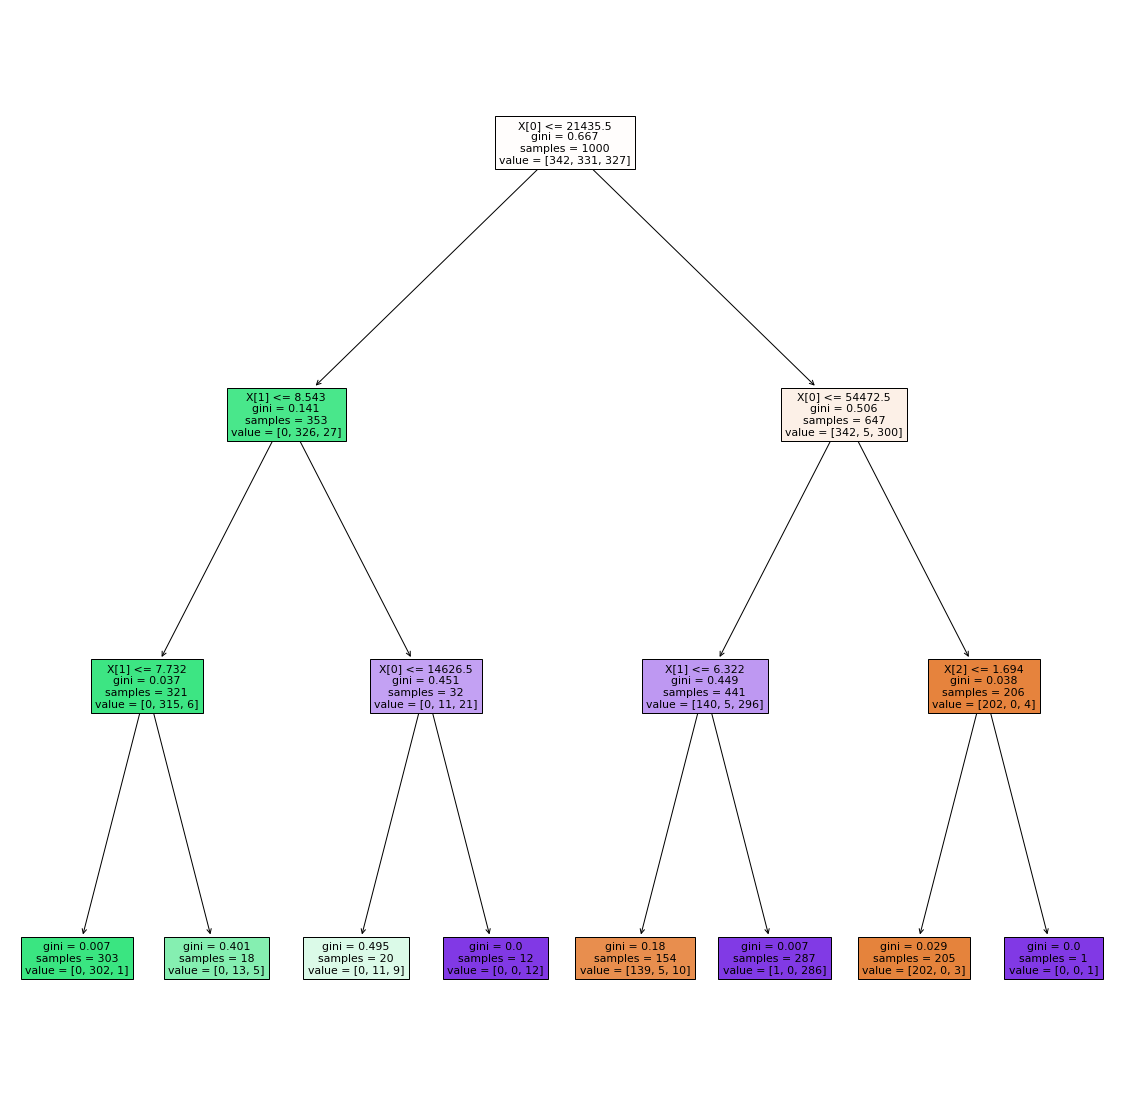

In [18]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(treeclf, filled=True)

